## Intelligent Robotics Python Library 사용 예제 5 - Numerical Inverse Kinematics
## Written by 최동일, dongilc@mju.ac.kr
### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
import numpy as np
sympy.init_printing()

### 예제 5. 예제 3-8의 2-Link Planar 로봇의 역기구학

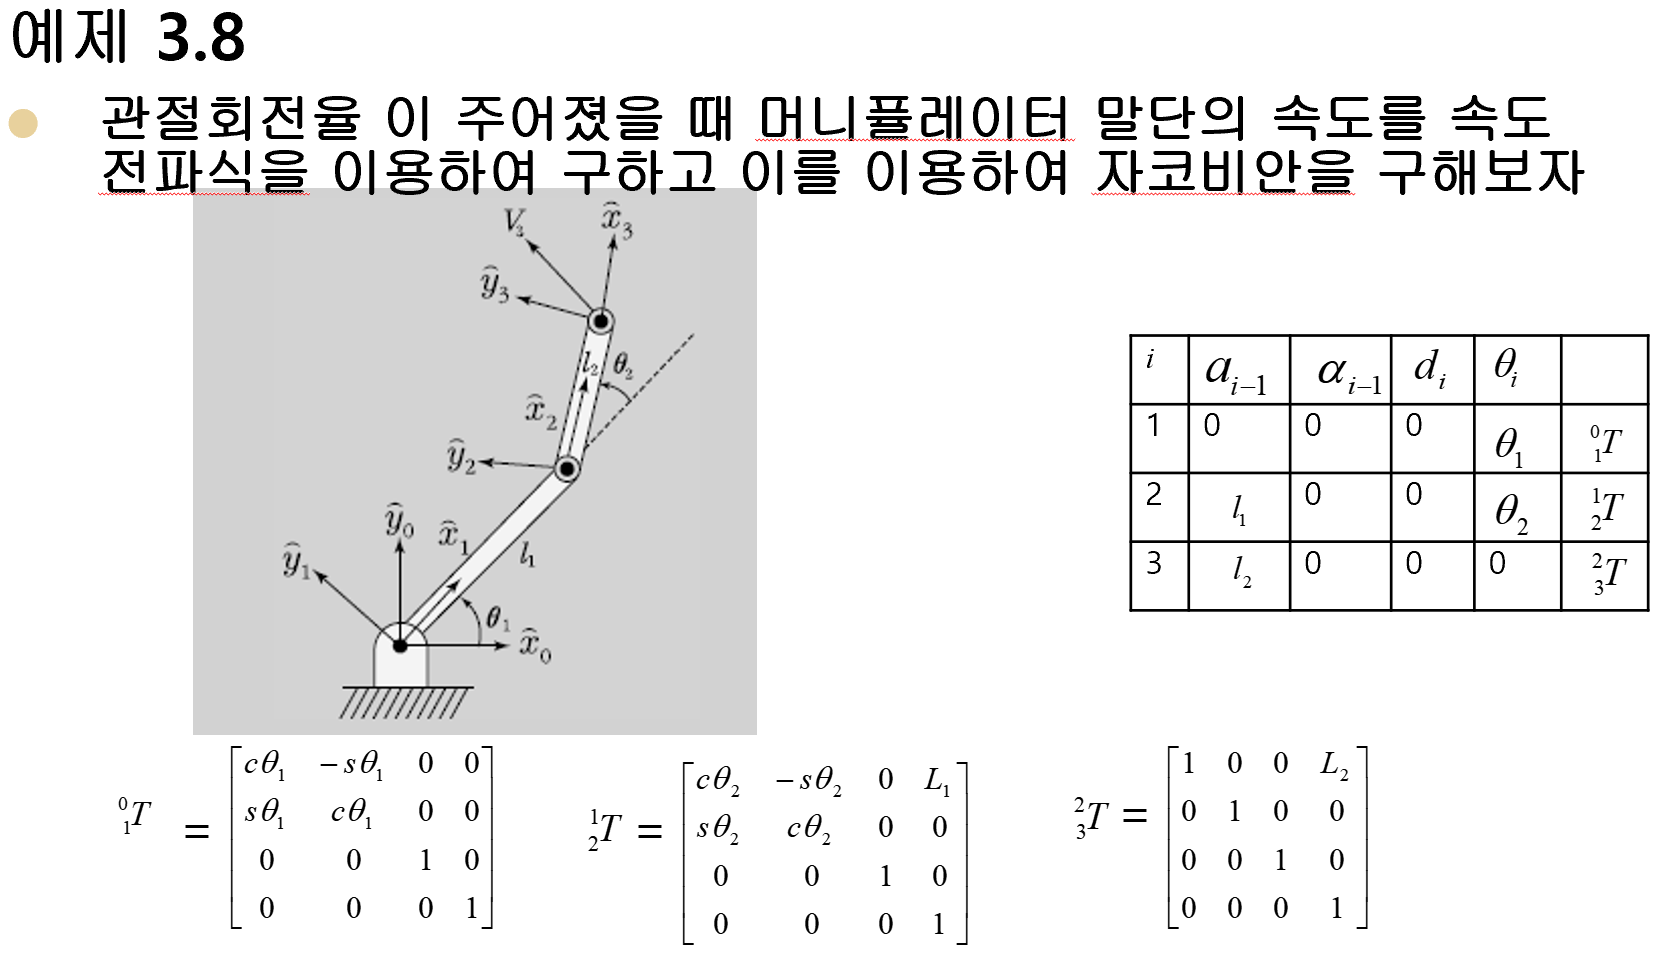

In [2]:
from IPython.display import Image
Image('figure/ex3.8_fig.PNG', width=700)

In [3]:
# 정기구학
theta1,theta2,l1,l2,x,y,phi = sympy.symbols('theta1,theta2,l1,l2,x,y,phi')
T01 = ir.DH(0,0,0,theta1)
T12 = ir.DH(l1,0,0,theta2)
T23 = ir.DH(l2,0,0,0)
T02 = sympy.simplify(T01*T12)
T03 = sympy.simplify(T01*T12*T23)

In [4]:
T03

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [5]:
# Jacobian
theta1,theta2 = ir.dynamicsymbols('theta1,theta2')

w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)

v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)

qd = sympy.Matrix([[theta1.diff()],[theta2.diff()]])

w_0_3 = ir.get_R_from_T(T01*T12*T23)*w_3_3
v_0_3 = ir.get_R_from_T(T01*T12*T23)*v_3_3
J_0_3 = ir.get_Jacobian_from_vel(w_0_3,v_0_3,qd)

# Space Jacobian
J_0_3

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎣              1                       1        ⎦

### Analytic Inverse Kinematics Solution

In [6]:
# Parameter

In [7]:
param = {l1:1,l2:1,x:1.5,y:1}

In [8]:
import numpy as np
import math
cos_th2 = (x*x + y*y - (l1*l1 + l2*l2))/(2*l1*l2)
c2 = cos_th2.subs(param)
# th2 solution
th2_1 = math.atan2(math.sqrt(1-math.pow(c2,2)),c2)
th2_2 = math.atan2(-math.sqrt(1-math.pow(c2,2)),c2)
th2_sol = [th2_1, th2_2]

In [9]:
th2_sol, np.rad2deg(th2_sol)

([0.895664793857865, -0.895664793857865], array([ 51.31781255, -51.31781255]))

In [10]:
# th1 solution
c2,s2 = sympy.symbols('c2,s2')
cos_th1 = ((l1+l2*c2)*x+l2*s2*y)/(pow(l1+l2*c2,2)+pow(l2*s2,2))
sin_th1 = (-l2*s2*x+(l1+l2*c2)*y)/(pow(l1+l2*c2,2)+pow(l2*s2,2))
# solution 1
c2_1 = np.cos(th2_sol[0])
s2_1 = np.sin(th2_sol[0])
c1_1 = cos_th1.subs(param).subs({c2:c2_1,s2:s2_1})
s1_1 = sin_th1.subs(param).subs({c2:c2_1,s2:s2_1})
th1_1 = math.atan2(s1_1,c1_1)
# solution 2
c2_2 = np.cos(th2_sol[1])
s2_2 = np.sin(th2_sol[1])
c1_2 = cos_th1.subs(param).subs({c2:c2_2,s2:s2_2})
s1_2 = sin_th1.subs(param).subs({c2:c2_2,s2:s2_2})
th1_2 = math.atan2(s1_2,c1_2)
th1_sol = [th1_1, th1_2]

In [11]:
th1_sol, np.rad2deg(th1_sol)

([0.14017020661863502, 1.0358350004765], array([ 8.03116125, 59.3489738 ]))

In [12]:
# Solution Set
th_1 = [th1_1, th2_1]
th_2 = [th1_2, th2_2]

In [13]:
# Elbow down solution in Degree
np.rad2deg(th_1)

array([ 8.03116125, 51.31781255])

In [14]:
# Elbow up solution in Degree
np.rad2deg(th_2)

array([ 59.3489738 , -51.31781255])

## Plot

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Plot Two-Link Planar Robot by Position
def Plot_2Link_Robot_by_Position(x1,y1,x2,y2):
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.plot([0,x1],[0,y1],'r')
    ax.text(x1, y1, '(%.2f,%.2f)' % (x1,y1))
    ax.plot([x1,x2],[y1,y2],'b')
    ax.text(x2, y2, '(%.2f,%.2f)' % (x2,y2))
    ax.set_aspect('equal')
    
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(True)
    plt.xticks(np.arange(-2, 2, step=0.5))
    plt.yticks(np.arange(-2, 2, step=0.5))

# Plot Two-Link Planar Robot by Angle
def Plot_2Link_Robot_by_Angle(l1,l2,th1,th2):
    x1 = l1*np.cos(th1)
    y1 = l1*np.sin(th1)
    x2 = l1*np.cos(th1) + l2*np.cos(th1+th2)
    y2 = l1*np.sin(th1) + l2*np.sin(th1+th2)
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.plot([0,x1],[0,y1],'r')
    ax.text(x1, y1, '(%.2f,%.2f)' % (x1,y1))
    ax.plot([x1,x2],[y1,y2],'b')
    ax.text(x2, y2, '(%.2f,%.2f)' % (x2,y2))
    ax.set_aspect('equal')
    
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(True)
    plt.xticks(np.arange(-2, 2, step=0.5))
    plt.yticks(np.arange(-2, 2, step=0.5))
    
# Get End-effector Position
def get_pos_2Link_Robot(l1,l2,th1,th2):
    x = l1*np.cos(th1) + l2*np.cos(th1+th2)
    y = l1*np.sin(th1) + l2*np.sin(th1+th2)
    return np.array([x,y])

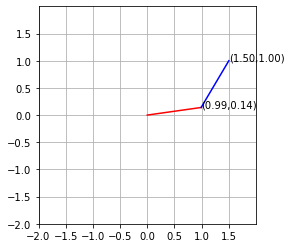

In [17]:
Plot_2Link_Robot_by_Angle(1,1,th_1[0],th_1[1])

## Numerical IK

In [18]:
theta1,theta2 = sympy.symbols('theta1,theta2')
J = J_0_3[0:2,0:2].subs({l1:1,l2:1})

In [19]:
J

⎡-sin(θ₁) - sin(θ₁ + θ₂)  -sin(θ₁ + θ₂)⎤
⎢                                      ⎥
⎣cos(θ₁) + cos(θ₁ + θ₂)   cos(θ₁ + θ₂) ⎦

In [20]:
func_J = sympy.lambdify([theta1,theta2],J,'numpy')

In [21]:
# Initialization. 
# index, i = 0
# set X desired, and initial guess, th_0
i = 0
x_des = np.array([list(param.values())[2], list(param.values())[3]]) # desired value from target
theta_0 = np.array([0.01, 0.01])

In [22]:
func_J(theta_0[0],theta_0[1])

array([[-0.0299985 , -0.01999867],
       [ 1.99975001,  0.99980001]])

In [23]:
epsilon = 1e-10
theta = theta_0
theta_store = theta_0
err = x_des - get_pos_2Link_Robot(1,1,theta[0],theta[1])

while (np.linalg.norm(err) > epsilon):
    J_now = func_J(theta[0],theta[1])
    # Calculate Jacobian using numpy function
    #J_inv = np.linalg.inv(J_now)
    # Calculate Jacobian using Moore-Penrose PseudoInverse, J+ = (J^T*J)^-1*J^T
    J_inv = np.linalg.inv((J_now.transpose()@J_now))@J_now.transpose()
    theta = theta + J_inv@err
    err = x_des - get_pos_2Link_Robot(1,1,theta[0],theta[1])
    theta_store = np.vstack([theta_store, theta])
    i+=1

In [24]:
err

array([1.90292226e-12, 1.15052412e-12])

In [25]:
np.linalg.norm(err)

In [26]:
theta_store

array([[ 1.00000000e-02,  1.00000000e-02],
       [-4.80159328e+01,  9.70392662e+01],
       [-4.95407227e+01,  9.92172457e+01],
       [-4.89591381e+01,  9.91854164e+01],
       [-4.92015676e+01,  9.95652760e+01],
       [-4.92283017e+01,  9.96328544e+01],
       [-4.92296460e+01,  9.96352970e+01],
       [-4.92296475e+01,  9.96353001e+01]])

In [27]:
theta

array([-49.22964746,  99.63530012])

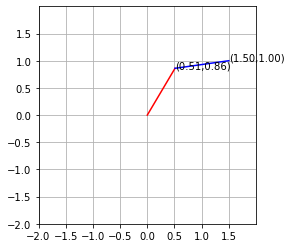

In [28]:
Plot_2Link_Robot_by_Angle(1,1,theta[0],theta[1])